In [4]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [5]:
rain_minimum = 1.0
rain_maximum = 250.0
rain_step = 1.0
spd = 86400.0
sph = 3600.0
mpy = 30.4167

nrainbin = int((rain_maximum-rain_minimum)/rain_step) + 1

rain_pdf = np.linspace(rain_minimum,rain_maximum, num=nrainbin, endpoint=True)
rain_bin = np.zeros((nrainbin-1))


In [6]:

pr = xr.load_dataset('/home/mkibria/Academic/pr_of_thesis/GCM/Noresm1-M/pr_Amon_NorESM1-M_historical_r1i1p1_185001-200512.nc')

pr




<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1850-01-01 00:00:00 ... 2006-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -89.05 -89.05 ... 89.05 89.05 90.0
    lon_bnds   (lon, bnds) float64 -1.25 1.25 1.25 3.75 ... 356.2 356.2 358.8
    pr         (time, lat, lon) float32 7.435e-07 7.435e-07 ... 3.993e-06
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [7]:
#changing time dim to datetime64[ns] dtype

datetimeindex = pr.indexes['time'].to_datetimeindex()
pr['time']=datetimeindex
pr

/home/mkibria/miniconda3/envs/esp-sp/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_10806/3522490540.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = pr.indexes['time'].to_datetimeindex()


<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1850-01-01 00:00:00 ... 2006-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -89.05 -89.05 ... 89.05 89.05 90.0
    lon_bnds   (lon, bnds) float64 -1.25 1.25 1.25 3.75 ... 356.2 356.2 358.8
    pr         (time, lat, lon) float32 7.435e-07 7.435e-07 ... 3.993e-06
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [8]:
pr = pr.sel(time=slice('1980-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))


In [10]:
pr= pr.sel(lon=slice(86,94),lat=slice(18,27))
pr

<xarray.Dataset>
Dimensions:    (time: 311, bnds: 2, lat: 5, lon: 3)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2005-11-16
  * lat        (lat) float64 18.0 19.89 21.79 23.68 25.58
  * lon        (lon) float64 87.5 90.0 92.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1980-01-01 00:00:00 ... 2005-12-01 00:00:00
    lat_bnds   (lat, bnds) float64 17.05 18.95 18.95 20.84 ... 24.63 24.63 26.53
    lon_bnds   (lon, bnds) float64 86.25 88.75 88.75 91.25 91.25 93.75
    pr         (time, lat, lon) float32 8.478e-07 1.648e-07 ... 1.643e-05
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [11]:

#interpolating to new lat and lon

#new_lon = np.arange(85,94,0.5)
#new_lat = np.arange(17,28,0.5)
#pr = pr.interp(latitude=new_lat,longitude=new_lon)
#pr


In [12]:
size = pr.pr.shape
print(size)


(311, 5, 3)


In [13]:
for time in range(size[0]):
        data = pr.pr[time,Ellipsis] * spd
        nzd  = data.values[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin = rain_bin + hist[0]

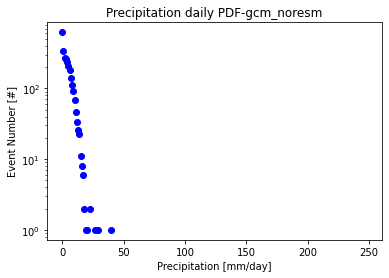

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(rain_bin, 'bo')
ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('Precipitation [mm/day]')
plt.ylabel('Event Number [#]')
plt.title('Precipitation daily PDF-gcm_noresm')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/pdf_gcm_noresm.png")



plt.show( )